### Stock Price Prediction using Deep Learning Models

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = pd.read_csv("DATA SET ML.csv")
# Show the data
print(df)


            Date        Open        High         Low       Close   Adj Close  \
0     2013-05-09   16.421785   16.535713   16.270714   16.313213   14.107369   
1     2013-05-10   16.356071   16.418215   16.088572   16.177500   13.990006   
2     2013-05-13   16.125357   16.353571   16.125000   16.240713   14.044678   
3     2013-05-14   16.208929   16.257143   15.791071   15.852143   13.708649   
4     2013-05-15   15.684286   15.750000   15.084286   15.316071   13.245062   
...          ...         ...         ...         ...         ...         ...   
2429  2022-12-30  128.410004  129.949997  127.430000  129.929993  129.043137   
2430  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216301   
2431  2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2432  2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166634   
2433  2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   

         Volume  
0     398487600  
1  

In [4]:
df.shape

(2434, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2434 non-null   object 
 1   Open       2434 non-null   float64
 2   High       2434 non-null   float64
 3   Low        2434 non-null   float64
 4   Close      2434 non-null   float64
 5   Adj Close  2434 non-null   float64
 6   Volume     2434 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 133.2+ KB


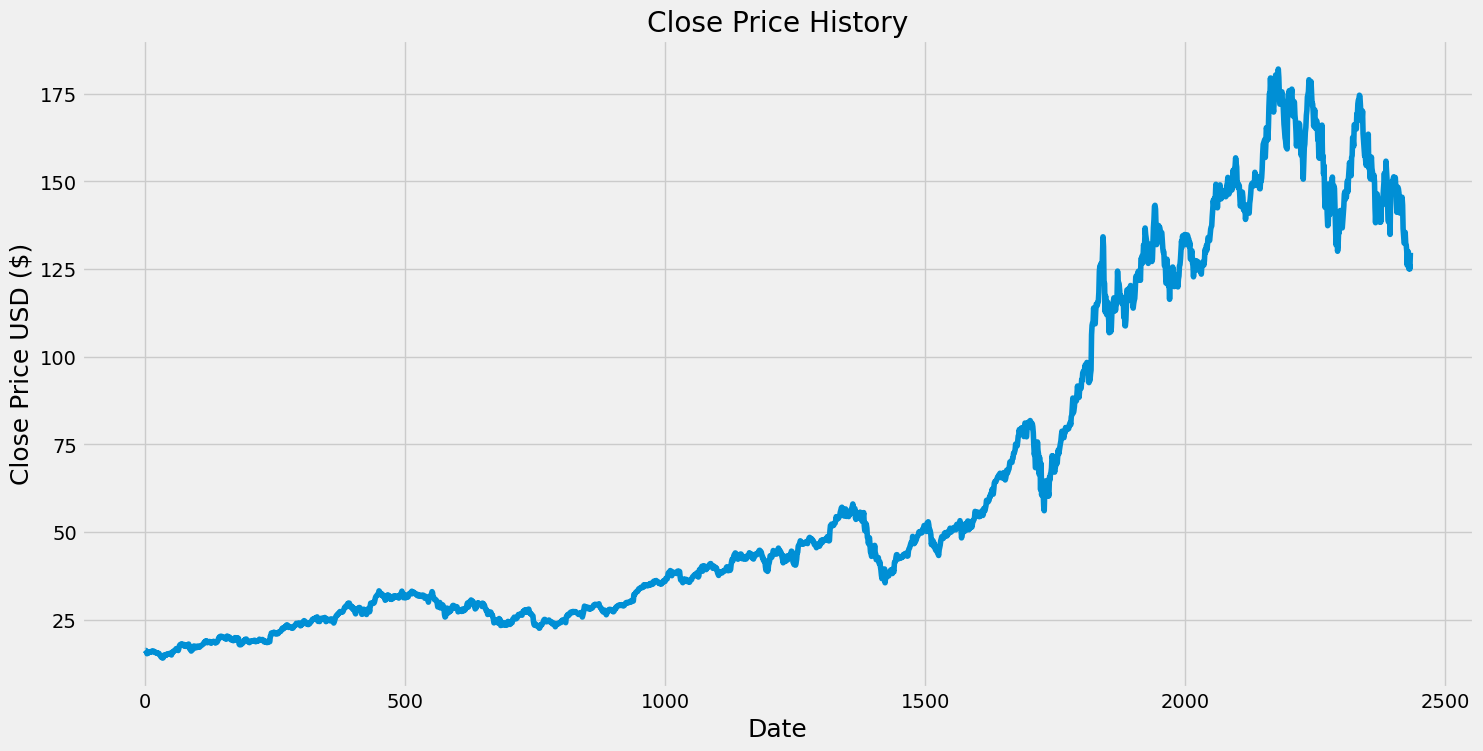

In [6]:
#Visualization of the closing price over days
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel( 'Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18),
plt.show()


#### Data Preprocessing and splitting of training and testing data

In [7]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#fill the NAN values(if any) with the mean value of the attribute 
data.fillna(data.mean(),inplace=True)
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)
print(training_data_len)
print(dataset)

1948
[[ 16.313213]
 [ 16.1775  ]
 [ 16.240713]
 ...
 [126.360001]
 [125.019997]
 [129.619995]]


In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.013395  ],
       [0.01258692],
       [0.01296331],
       ...,
       [0.66864436],
       [0.66066561],
       [0.68805528]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and.y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print((x_train))
        print(y_train)
       # print()
print(len(x_train))    

[array([0.013395  , 0.01258692, 0.01296331, 0.01064966, 0.00745774,
       0.00867624, 0.00839553, 0.01045189, 0.00975652, 0.0101159 ,
       0.01028389, 0.01092398, 0.01013504, 0.01088145, 0.01229134,
       0.01189794, 0.01210846, 0.01180861, 0.01091548, 0.00950133,
       0.01021372, 0.00959277, 0.00931845, 0.008168  , 0.0089697 ,
       0.00771292, 0.00812759, 0.00807868, 0.00621372, 0.00490378,
       0.00419352, 0.00186284, 0.00188198, 0.00091228, 0.        ,
       0.0005848 , 0.00328336, 0.00525465, 0.00574588, 0.00502712,
       0.00452313, 0.0060755 , 0.00573099, 0.007126  , 0.00696013,
       0.0071579 , 0.00774482, 0.00776821, 0.00807656, 0.00662839,
       0.0069176 , 0.00536098, 0.00993727, 0.00950984, 0.01003934,
       0.01148538, 0.01266136, 0.01249335, 0.01337586, 0.01462201])]
[0.016091441161021694]
1888


In [10]:
#convert the x train and y train to numbly arrays
x_train, у_train = np.array(x_train),np.array(y_train)

In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1888, 60, 1)

### Training the Model

In [12]:
#Model selected for prediction is LSTM
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
# Assuming x_train is defined elsewhere
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
y_train = np.array(y_train)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x test and y test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()
loc=('lower right')

In [ ]:
valid

In [ ]:
#Predicting the price on the nxt day to the last day of the dataset. 
apple = pd.read_csv("C:\\Users\\Himav\\Downloads\\AAPL (1).csv")
#Create a new dataframe
new_df= apple.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#p=scaler.inverse_transform(X_test)
#print(p)
pred_price